# Master run for code for GHA stability paper

All data should be regenerated at some point, after double-checking that the input data doesn't have missing timesteps...

In [1]:
import glob
from funcs_process import (calculate_h,calculate_hs,calculate_nearsurface,
                           calculate_hdiff,calculate_unstable,calculate_seasmeans)
from funcs_wrapper import (wrapper_figure3,wrapper_figure4,wrapper_figure5,wrapper_figure6,
                           wrapper_figure7,wrapper_figure89,wrapper_figure10,wrapper_figure11,
                           wrapper_figure12)
from funcs_support import get_params
dir_list = get_params()

In [2]:
mods = ['MERRA2','JRA-55','ERA5']
#mods = ['JRA-55','MERRA2']
#mods = ['JRA-55','ERA5']
#mods = ['ERA5']
mods = ['MERRA2']

In [3]:
file_params = {'overwrite':False}

## Data processing

### Calculate $h$, $h^*$, $h_s-h^*$

In [ ]:
for mod in mods:
    #if len(glob.glob(dir_list['raw']+mod+'/z_day_*'))>0:
    #    calculate_h(mod=mod,comp_vars = ['ta','hus','z'])
    #else:
    
    calculate_h(mod=mod,**file_params)
    
    calculate_hs(mod=mod,**file_params)
    calculate_nearsurface(var_list=['h'],mod=mod,source_dir='proc',**file_params)
    
    calculate_hdiff(mod=mod,**file_params)
    calculate_hdiff(mod=mod,use_surf=True,**file_params)


--------------------------
processing files of the form: "*HoA-merid-slice.nc"!
all files:
   /dx01/kschwarz/climate_proc/MERRA2/hsat_day_MERRA2_historical_reanalysis_19800101-20211231_HoA-merid-slice.nc
   /dx01/kschwarz/climate_proc/MERRA2/h_day_MERRA2_historical_reanalysis_19800101-20211231_HoA-merid-slice.nc
   /dx01/kschwarz/climate_proc/MERRA2/qsat_day_MERRA2_historical_reanalysis_19800101-20211231_HoA-merid-slice.nc
already exist!

--------------------------
processing files of the form: "*HoA.nc"!
all files:
   /dx01/kschwarz/climate_proc/MERRA2/hsat_day_MERRA2_historical_reanalysis_19800101-20211231_HoA.nc
   /dx01/kschwarz/climate_proc/MERRA2/h_day_MERRA2_historical_reanalysis_19800101-20211231_HoA.nc
   /dx01/kschwarz/climate_proc/MERRA2/qsat_day_MERRA2_historical_reanalysis_19800101-20211231_HoA.nc
already exist!

--------------------------
processing files of the form: "*eq-Atl.nc"!
/dx01/kschwarz/climate_proc/MERRA2/hsat_day_MERRA2_historical_reanalysis_19800101-20211231

In [5]:
# Some auxiliary data calcs... 
for mod in mods: 
    calculate_nearsurface(var_list=['hus','ta'],mod=mod,source_dir='raw',**file_params)

/dx01/kschwarz/climate_proc/MERRA2/hus-nsurf_day_MERRA2_historical_reanalysis_19800101-20211231_eq-EPac.nc already exists!
/dx01/kschwarz/climate_proc/MERRA2/ta-nsurf_day_MERRA2_historical_reanalysis_19800101-20220630_subtrop-AfrSAsia.nc already exists!
/dx01/kschwarz/climate_proc/MERRA2/hus-nsurf_day_MERRA2_historical_reanalysis_19800101-20220630_subtrop-WAfr.nc already exists!
/dx01/kschwarz/climate_proc/MERRA2/ta-nsurf_day_MERRA2_historical_reanalysis_19800101-20220131_eq-IO-Pac.nc already exists!
/dx01/kschwarz/climate_proc/MERRA2/ta-nsurf_day_MERRA2_historical_reanalysis_19800101-20211231_HoA-merid-slice.nc already exists!
/dx01/kschwarz/climate_proc/MERRA2/hus-nsurf_day_MERRA2_historical_reanalysis_19800101-20211231_HoA-merid-slice.nc already exists!
/dx01/kschwarz/climate_proc/MERRA2/ta-nsurf_day_MERRA2_historical_reanalysis_19800101-20220131_eq-IO-WPac.nc already exists!
/dx01/kschwarz/climate_proc/MERRA2/hus-nsurf_day_MERRA2_historical_reanalysis_19800101-20220131_eq-IO-WPac.n

In [5]:
# Some auxiliary data calcs... 
for mod in mods: 
    #calculate_nearsurface(var_list=['ua','va'],mod=mod,source_dir='raw',**file_params)
    calculate_nearsurface(var_list=['h'],mod=mod,source_dir='proc',**file_params)

/dx01/kschwarz/climate_proc/MERRA2/h-nsurf_day_MERRA2_historical_reanalysis_19800101-20211231_HoA.nc already exists!
/dx01/kschwarz/climate_proc/MERRA2/h-nsurf_day_MERRA2_historical_reanalysis_19800101-20211231_HoA-merid-slice.nc already exists!
/dx01/kschwarz/climate_proc/MERRA2/h-nsurf_day_MERRA2_historical_reanalysis_19800101-20211231_eq-Atl.nc already exists!
/dx01/kschwarz/climate_proc/MERRA2/h-nsurf_day_MERRA2_historical_reanalysis_19800101-20211231_eq-EPac.nc already exists!
/dx01/kschwarz/climate_proc/MERRA2/h-nsurf_day_MERRA2_historical_reanalysis_19800101-20211231_eq-IO-WPac.nc already exists!
/dx01/kschwarz/climate_proc/MERRA2/h-nsurf_day_MERRA2_historical_reanalysis_19800101-20211231_eq-IO.nc already exists!
/dx01/kschwarz/climate_proc/MERRA2/h-nsurf_day_MERRA2_historical_reanalysis_19800101-20211231_subtrop-AfrSAsia.nc already exists!
/dx01/kschwarz/climate_proc/MERRA2/h-nsurf_day_MERRA2_historical_reanalysis_19800101-20211231_subtrop-WAfr.nc already exists!


### Calculate max daily $h_s-h^*$ from 3-hourly data

### Calculate $unstable$
Boolean of when $h_s-h^*>0$ locally, to be used in seasonal average calculations.

In [6]:
for mod in mods:
    for var in ['hdiff','hsdiff']:
        calculate_unstable(mod=mod,
                       var = var,
                       search_str = '*HoA.nc',**file_params)

/dx01/kschwarz/climate_proc/MERRA2/unstable_day_MERRA2_historical_reanalysis_19800101-20211231_HoA.nc saved!
/dx01/kschwarz/climate_proc/JRA-55/unstable_day_JRA-55_historical_reanalysis_19810101-20211231_HoA.nc already exists!
/dx01/kschwarz/climate_proc/JRA-55/unstable-s_day_JRA-55_historical_reanalysis_19810101-20211231_HoA.nc already exists!
/dx01/kschwarz/climate_proc/ERA5/unstable_day_ERA5_historical_reanalysis_19800101-20211231_HoA.nc already exists!
/dx01/kschwarz/climate_proc/ERA5/unstable-s_day_ERA5_historical_reanalysis_19800101-20211231_HoA.nc already exists!


/home/kschwarz/code/funcs_process.py:588: UserWarning: No files found for search: /dx01/kschwarz/climate_proc/MERRA2/hsdiff_day_MERRA2*HoA.nc
  warnings.warn('No files found for search: '+search_str)


### Calculate $\vec{u}q$

In [ ]:
for mod in mods: 
    calculate_uq(mod=mod)

### Calculate seasonal averages
Seasonal averages of: 

- $h_s-h^*$ and components
- $\vec{u}$, $\vec{u}q$

In [9]:
for mod in mods: 
    #for var in ['hdiff','hsat','h-nsurf','ta-nsurf','hus-nsurf','unstable']:
    for var in ['hdiff','hsat','ta-nsurf','h-nsurf','hus-nsurf','unstable']:
        calculate_seasmeans(mod = mod,var=var,search_dir = 'proc',
                            suffixes = ['HoA.nc'],
                            **file_params)
        calculate_seasmeans(mod = mod,var=var,search_dir = 'proc',
                            anomaly='clim',
                            suffixes = ['HoA.nc'],
                            **file_params)

/dx01/kschwarz/climate_proc/MERRA2/hdiff_seasavg_MERRA2_historical_reanalysis_19810101-20211231_HoA.nc already exists, skipped!
/dx01/kschwarz/climate_proc/MERRA2/hdiff-anom_seasavg_MERRA2_historical_reanalysis_19810101-20211231_HoA.nc already exists, skipped!
/dx01/kschwarz/climate_proc/MERRA2/hsat_seasavg_MERRA2_historical_reanalysis_19810101-20211231_HoA.nc already exists, skipped!
/dx01/kschwarz/climate_proc/MERRA2/hsat-anom_seasavg_MERRA2_historical_reanalysis_19810101-20211231_HoA.nc already exists, skipped!
/dx01/kschwarz/climate_proc/MERRA2/ta-nsurf_seasavg_MERRA2_historical_reanalysis_19810101-20211231_HoA.nc already exists, skipped!
/dx01/kschwarz/climate_proc/MERRA2/ta-nsurf-anom_seasavg_MERRA2_historical_reanalysis_19810101-20211231_HoA.nc already exists, skipped!
/dx01/kschwarz/climate_proc/CHIRPS/seasidxs_day_CHIRPS_historical_19810101-20211231_HoA.nc exists, loaded!


  0%|          | 0/41 [00:00<?, ?it/s]

/dx01/kschwarz/climate_proc/MERRA2/h-nsurf_seasavg_MERRA2_historical_reanalysis_19810101-20211231_HoA.nc saved!
/dx01/kschwarz/climate_proc/CHIRPS/seasidxs_day_CHIRPS_historical_19810101-20211231_HoA.nc exists, loaded!


  0%|          | 0/41 [00:00<?, ?it/s]

/dx01/kschwarz/climate_proc/MERRA2/h-nsurf-anom_seasavg_MERRA2_historical_reanalysis_19810101-20211231_HoA.nc saved!
/dx01/kschwarz/climate_proc/MERRA2/hus-nsurf_seasavg_MERRA2_historical_reanalysis_19810101-20211231_HoA.nc already exists, skipped!
/dx01/kschwarz/climate_proc/MERRA2/hus-nsurf-anom_seasavg_MERRA2_historical_reanalysis_19810101-20211231_HoA.nc already exists, skipped!
/dx01/kschwarz/climate_proc/MERRA2/unstable_seasavg_MERRA2_historical_reanalysis_19810101-20211231_HoA.nc already exists, skipped!
/dx01/kschwarz/climate_proc/MERRA2/unstable-anom_seasavg_MERRA2_historical_reanalysis_19810101-20211231_HoA.nc already exists, skipped!
/dx01/kschwarz/climate_proc/JRA-55/hdiff_seasavg_JRA-55_historical_reanalysis_19810101-20211231_HoA.nc already exists, skipped!
/dx01/kschwarz/climate_proc/JRA-55/hdiff-anom_seasavg_JRA-55_historical_reanalysis_19810101-20211231_HoA.nc already exists, skipped!
/dx01/kschwarz/climate_proc/JRA-55/hsat_seasavg_JRA-55_historical_reanalysis_19810101-

In [6]:
calculate_seasmeans(mod = 'CHIRPS',var='pr',search_dir = 'raw',
                            suffixes = ['19810101-20220630.nc'],
                    subset_params_load = {'lat':slice(-3,12.5),'lon':slice(32,55)},
                            **file_params)

/dx01/kschwarz/climate_proc/CHIRPS/pr_seasavg_CHIRPS_historical_obs_19810101-20211231_19810101-20220630.nc already exists, skipped!


In [4]:
calculate_seasmeans(mod='GPCP',var='pr',search_dir='raw',
                    mod_p='GPCP',
                    suffixes=['Africa.nc'],
                    suffix_out = 'Africa.nc',
                    stats_suffix = '19980101-20201231_Africa',
                            **file_params)

/dx01/kschwarz/climate_proc/GPCP/seasidxs_day_GPCP_historical_19970101-20201231_HoA.nc exists, loaded!


  0%|          | 0/24 [00:00<?, ?it/s]

/dx01/kschwarz/climate_proc/GPCP/pr_seasavg_GPCP_historical_observations_19970101-20201231_Africa.nc saved!


In [9]:
import xarray as xr
xr.open_dataset('/dx01/kschwarz/climate_proc/GPCP/pr_seasavg_GPCP_historical_observations_19970101-20201231_Africa.nc')

<xarray.Dataset>
Dimensions:     (season: 4, kind: 4, year: 24, lat: 16, bound: 2, lon: 23)
Coordinates:
  * lat         (lat) float32 -3.0 -2.0 -1.0 0.0 1.0 ... 8.0 9.0 10.0 11.0 12.0
  * lon         (lon) float32 32.0 33.0 34.0 35.0 36.0 ... 51.0 52.0 53.0 54.0
  * season      (season) object 'long_dry' 'long_rains' ... 'short_rains'
  * year        (year) int64 1997 1998 1999 2000 2001 ... 2017 2018 2019 2020
  * kind        (kind) object 'dunning_local' 'dunning' 'month' 'month_alt'
Dimensions without coordinates: bound
Data variables:
    lat_bounds  (season, kind, year, lat, bound, lon) float32 ...
    lon_bounds  (season, kind, year, lon, bound, lat) float32 ...
    pr          (season, kind, year, lat, lon) float32 ...
Attributes: (12/49)
    Conventions:                CF-1.6, ACDD 1.3
    title:                      Global Precipitation Climatatology Project (G...
    source:                     /data1/GPCP_CDR/GPCP_Output/1DD//bin/199701/s...
    references:                 Huffman et al. 1997, http://dx.doi.org/10.117...
    history:                    1) 2017-05-30T16:53:52Z, Dr. Jian-Jian Wang, ...
    Metadata_Conventions:       CF-1.6, Unidata Dataset Discovery v1.0, NOAA ...
    ...                         ...
    spatial_resolution:         1 degree
    comment:                    Processing computer: eagle2.umd.edu
    SOURCE:                     calculate_seasavgs() from funcs_process.py
    DESCRIPTION:                Seasonal mean values calculated from the seas...
    DESCRIPTION2:               subset by command line to Africa, 1981-2021
    STATS_FILE:                 /dx01/kschwarz/climate_proc/GPCP/pr_ann_GPCP_...

In [ ]:
calculate_seasmeans(mod = 'GPCP',var='pr',search_dir = 'raw',
                            suffixes = ['Africa.nc'],
                    subset_params_load = {'lat':slice(-3,12.5),'lon':slice(32,55)},
                            **file_params)

In [8]:
for mod in ['CHIRPS','JRA-55','MERRA2','ERA5']:
    if mod == 'CHIRPS':
        suffix = '19810101-20220630.nc'
    else:
        suffix = 'HoA.nc'
    calculate_seasmeans(mod = mod,var='pr',search_dir = 'raw',
                            suffixes = suffix,
                    subset_params_load = {'lat':slice(-3,12.5),'lon':slice(32,55)},
                            **file_params)

/dx01/kschwarz/climate_proc/CHIRPS/pr_seasavg_CHIRPS_historical_obs_19810101-20211231_19810101-20220630.nc already exists, skipped!
/dx01/kschwarz/climate_proc/CHIRPS/seasidxs_day_CHIRPS_historical_19810101-20211231_HoA.nc exists, loaded!


  0%|          | 0/41 [00:00<?, ?it/s]

/dx01/kschwarz/climate_proc/JRA-55/pr_seasavg_JRA-55_historical_reanalysis_19810101-20211231_HoA.nc saved!
/dx01/kschwarz/climate_proc/CHIRPS/seasidxs_day_CHIRPS_historical_19810101-20211231_HoA.nc exists, loaded!


  0%|          | 0/41 [00:00<?, ?it/s]

/dx01/kschwarz/climate_proc/MERRA2/pr_seasavg_MERRA2_historical_reanalysis_19810101-20211231_HoA.nc saved!
/dx01/kschwarz/climate_proc/CHIRPS/seasidxs_day_CHIRPS_historical_19810101-20211231_HoA.nc exists, loaded!


  0%|          | 0/41 [00:00<?, ?it/s]

/dx01/kschwarz/climate_proc/ERA5/pr_seasavg_ERA5_historical_reanalysis_19810101-20211231_HoA.nc saved!


In [ ]:
for mod in mods: 
    for var in ['ua','va']:
        calculate_seasmeans(mod = mod,var=var,search_dir = 'raw',
                            anomaly='clim',
                            suffixes = ['eq-EPac-Atl.nc','eq-IO-WPac.nc','eq-IO.nc'],
                            calculate_local=False,
                            **file_params)
        calculate_seasmeans(mod = mod,var=var,search_dir = 'raw',
                            suffixes = ['eq-EPac-Atl.nc','eq-IO-WPac.nc','eq-IO.nc'],
                            calculate_local=False,
                            **file_params)
        

## Figures

### Figure 1: GHA mean rainfall in a global / zonal context

In [ ]:
# See `plot_figure1.py`

### Figure 2: GHA study area

In [ ]:
# See `plot_figure2.py`

### Figure 3 and S1-S2: Boxplots and Histograms

calculating or loading seasonal booleans...
/dx01/kschwarz/aux_data/seasidxs_day_CHIRPS_historical_19800101-20221231_HoA.nc exists, loaded!
plotting...
../figures/figure3.pdf saved!
../figures/figure3.png saved!


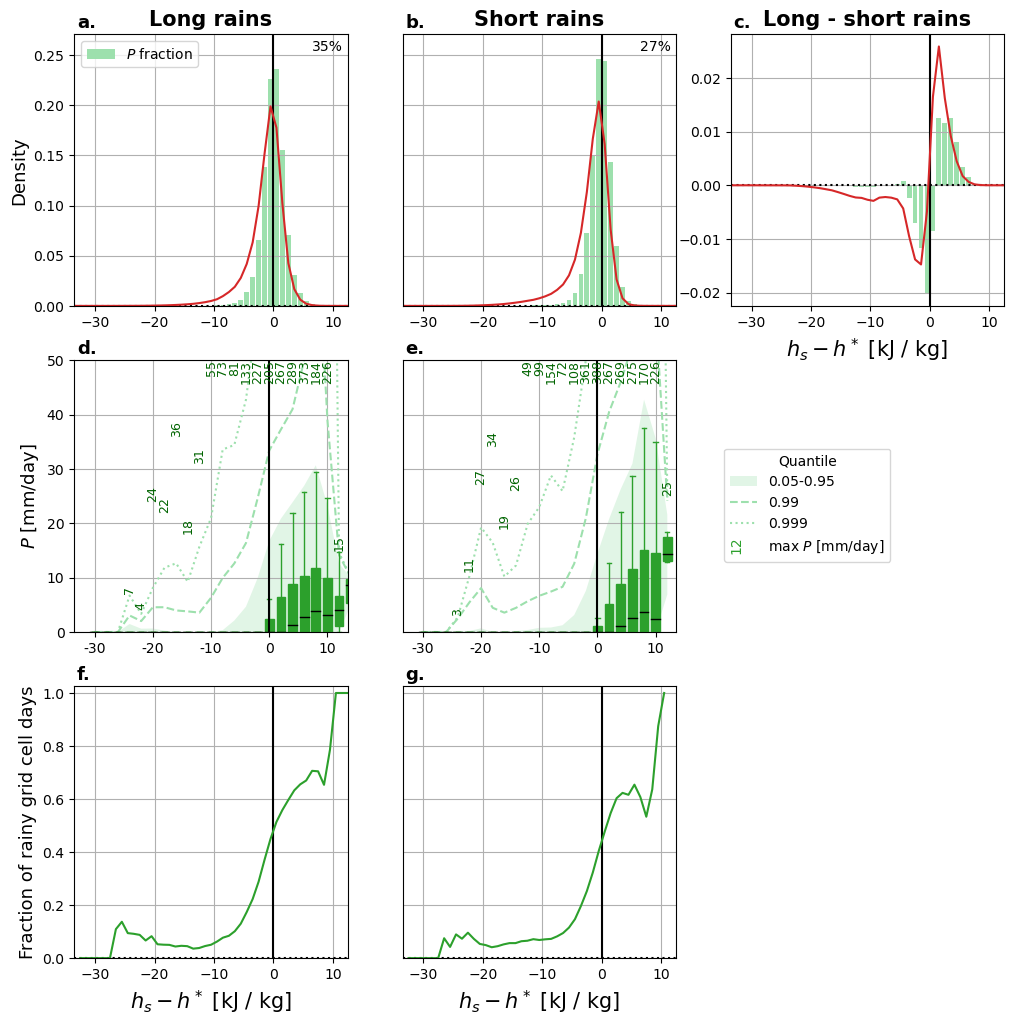

In [4]:
wrapper_figure3(save_fig=True,output_fn=dir_list['figs']+'figure3')

calculating or loading seasonal booleans...
plotting...
../figures/figure_s4.pdf saved!
../figures/figure_s4.png saved!


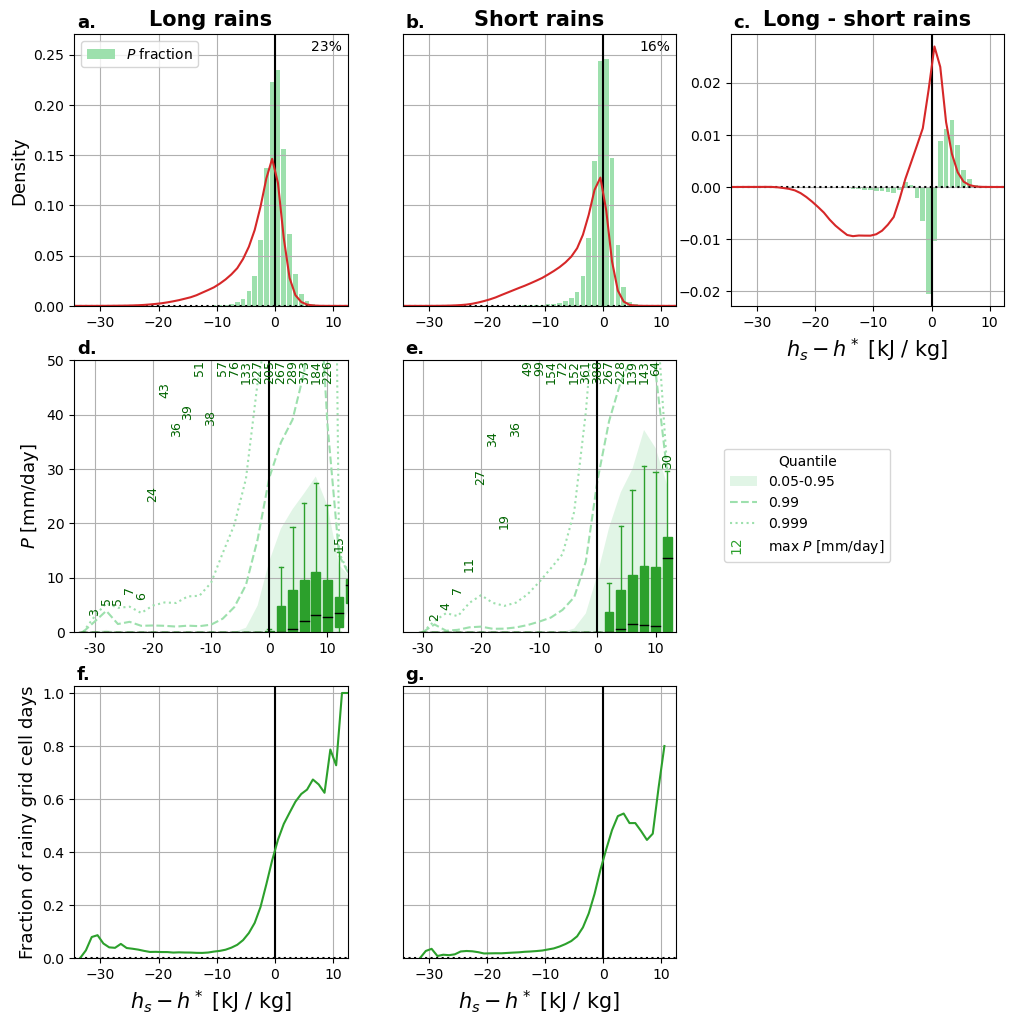

In [5]:
wrapper_figure3(kind='month',save_fig=True,output_fn=dir_list['figs']+'figure_s4')

calculating or loading seasonal booleans...
/dx01/kschwarz/aux_data/seasidxs_day_CHIRPS_historical_19800101-20221231_HoA.nc exists, loaded!
plotting...
../figures/figure_s5.pdf saved!
../figures/figure_s5.png saved!


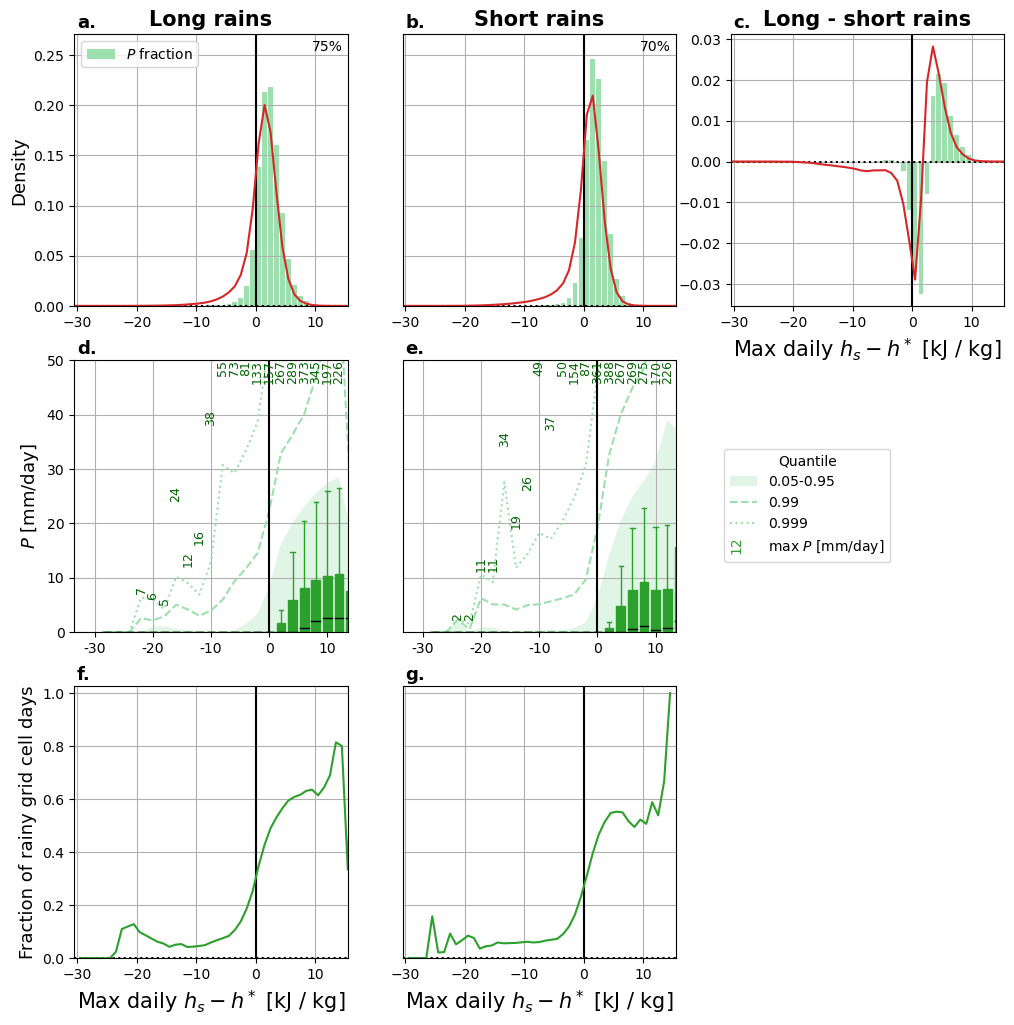

In [6]:
wrapper_figure3(var='hdiffmax',save_fig=True,output_fn=dir_list['figs']+'figure_s5')

### Figure 4: Seasonal cycle of % of grid cells unstable

/home/kschwarz/figures/figure4_MERRA2.pdf saved!
/home/kschwarz/figures/figure4_MERRA2.png saved!


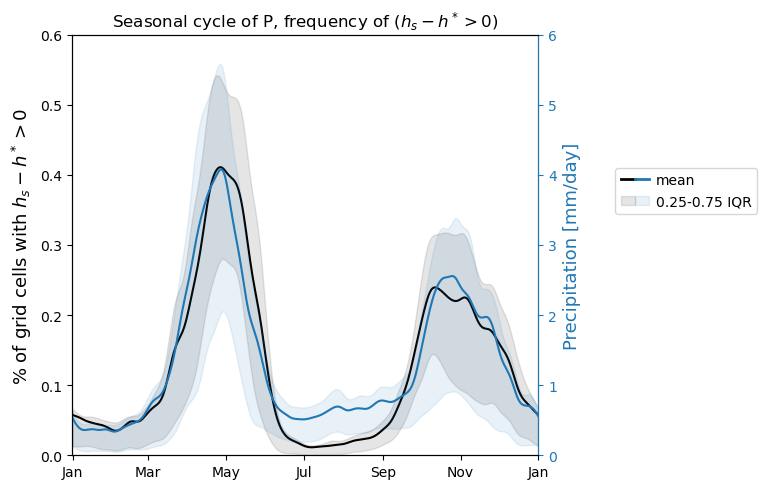

In [4]:
wrapper_figure4(mod_h='MERRA2',save_fig=True,output_fn=dir_list['figs']+'figure4')

#### Alternate versions

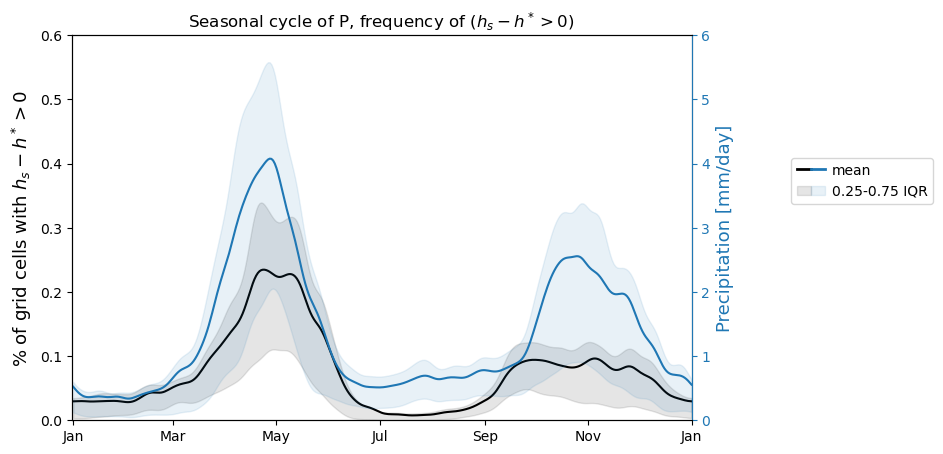

In [9]:
wrapper_figure4(mod_h='MERRA2',save_fig=False,plev=600,output_fn=dir_list['figs']+'figure4')

In [9]:
#for mod in mods:
#    wrapper_figure4(mod_h=mod)

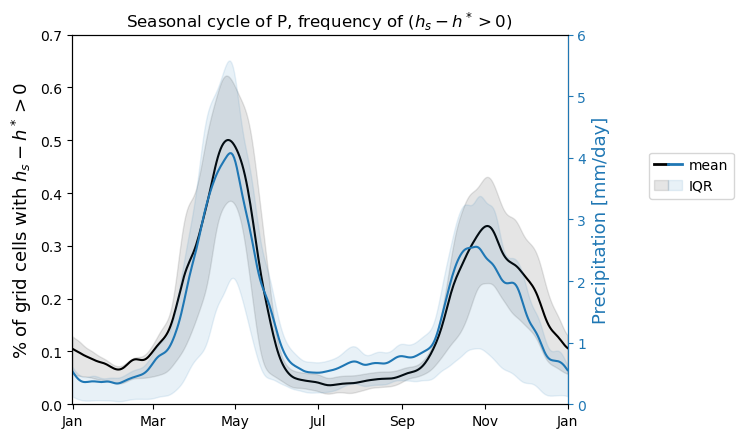

In [9]:
wrapper_figure4(mod_h='ERA5',plev=650,ylims = [[0,0.7],[0,6]])

### Figure 5: Seasonal cycle of $h_s-h^*$, $P$, and $h_s-h^*$ component anomalies

../figures/figure5.pdf saved!
../figures/figure5.png saved!


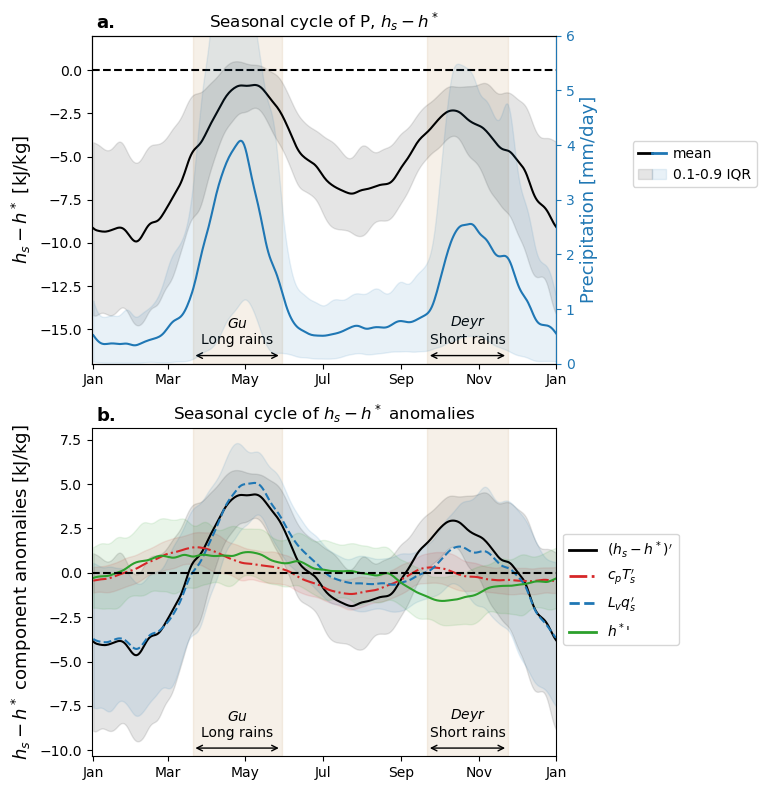

In [5]:
wrapper_figure5(mod_h = 'MERRA2',save_fig=True,output_fn=dir_list['figs']+'figure5')

#### Alternate versions

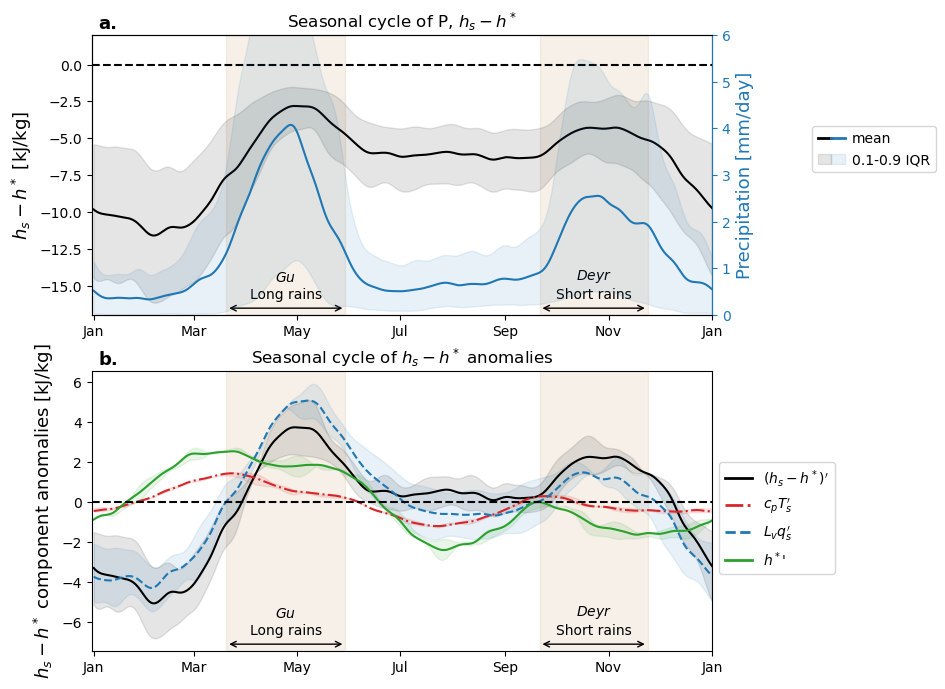

In [12]:
wrapper_figure5(mod_h = 'MERRA2',save_fig=False,output_fn=dir_list['figs']+'figure5',
                plev=750)

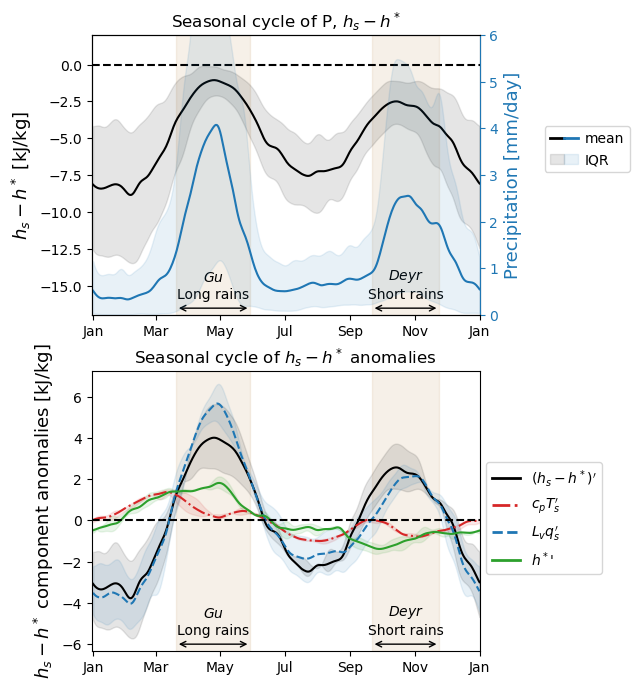

In [9]:
wrapper_figure5(mod_h = 'JRA-55')

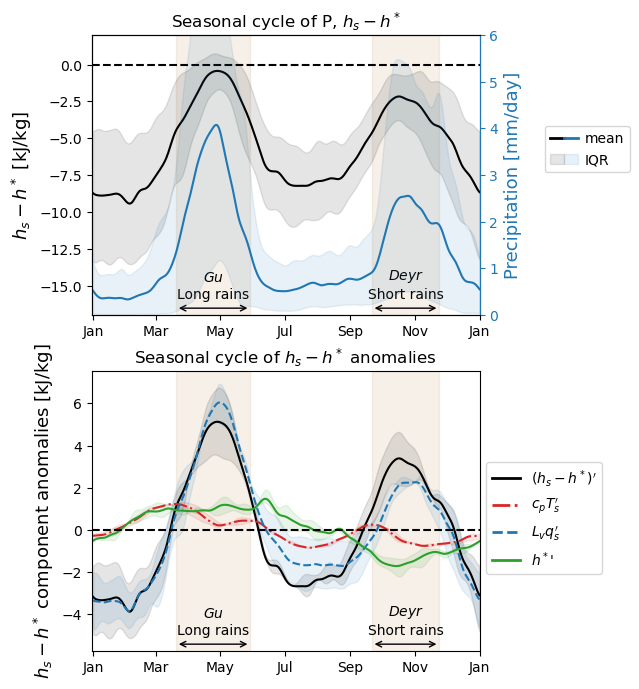

In [10]:
wrapper_figure5(mod_h = 'ERA5')

### Figure 6: Interannual variability in $h_s-h^*$ components

../figures/figure6.pdf saved!
../figures/figure6.png saved!


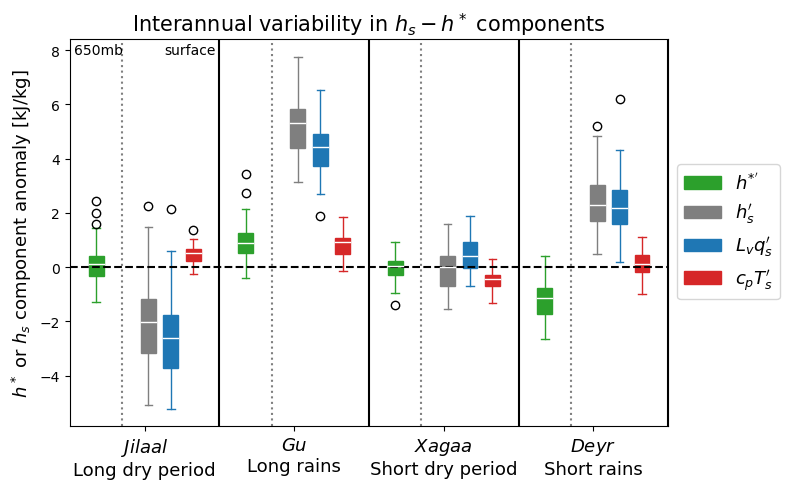

In [4]:
wrapper_figure6(mod='MERRA2',save_fig=True,output_fn=dir_list['figs']+'figure6')

#### Alternate versions

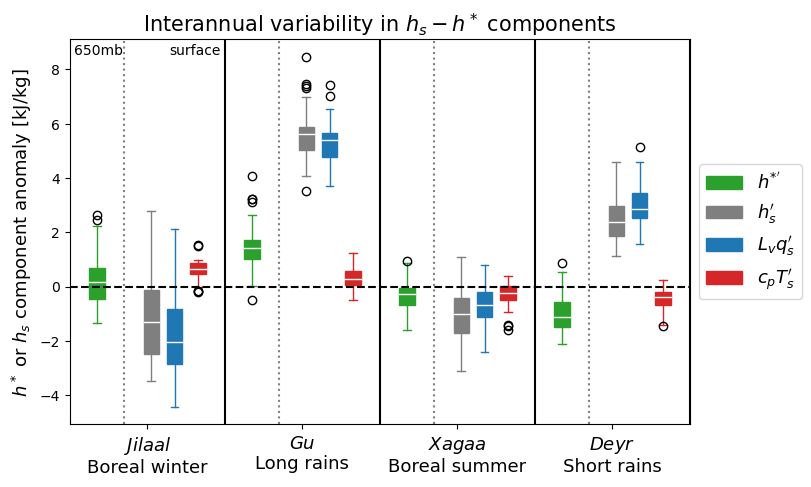

In [8]:
wrapper_figure6(mod='JRA-55')

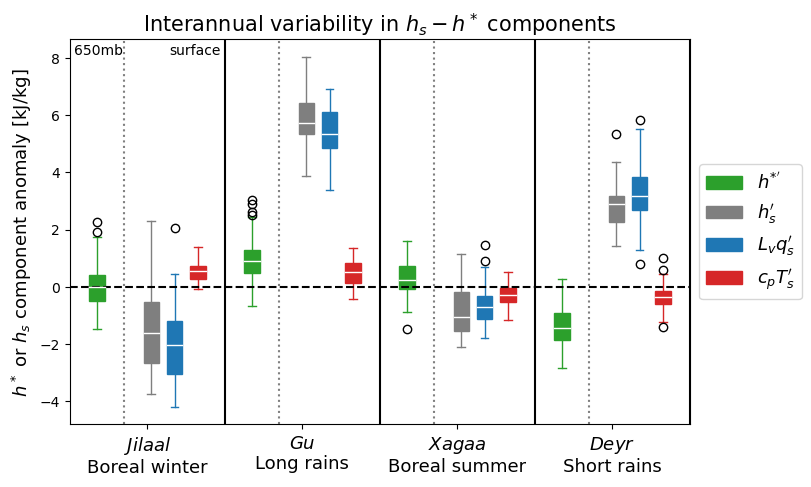

In [7]:
wrapper_figure6(mod='ERA5')

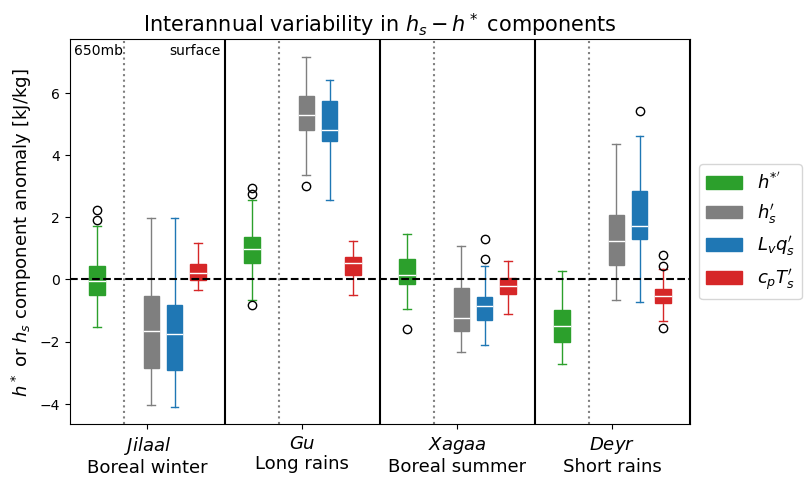

In [8]:
wrapper_figure6(mod='ERA5',mean_kind='dunning')

### Figure 7: $\vec{u}$ and $\vec{u}q_s$

../figures/figure7.pdf saved!
../figures/figure7.png saved!


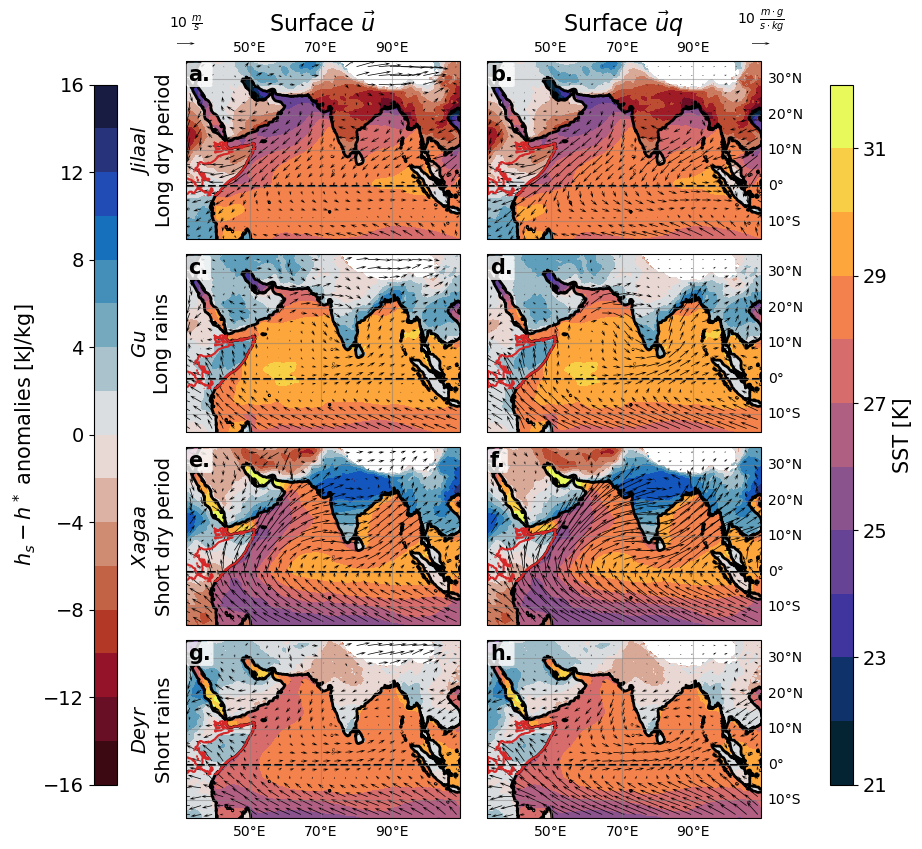

In [5]:
wrapper_figure7(save_fig=True,output_fn=dir_list['figs']+'figure7')

### Figures 8 - 9: $h_s$ and $h^*$ anomaly maps

../figures/figure8.pdf saved!
../figures/figure8.png saved!


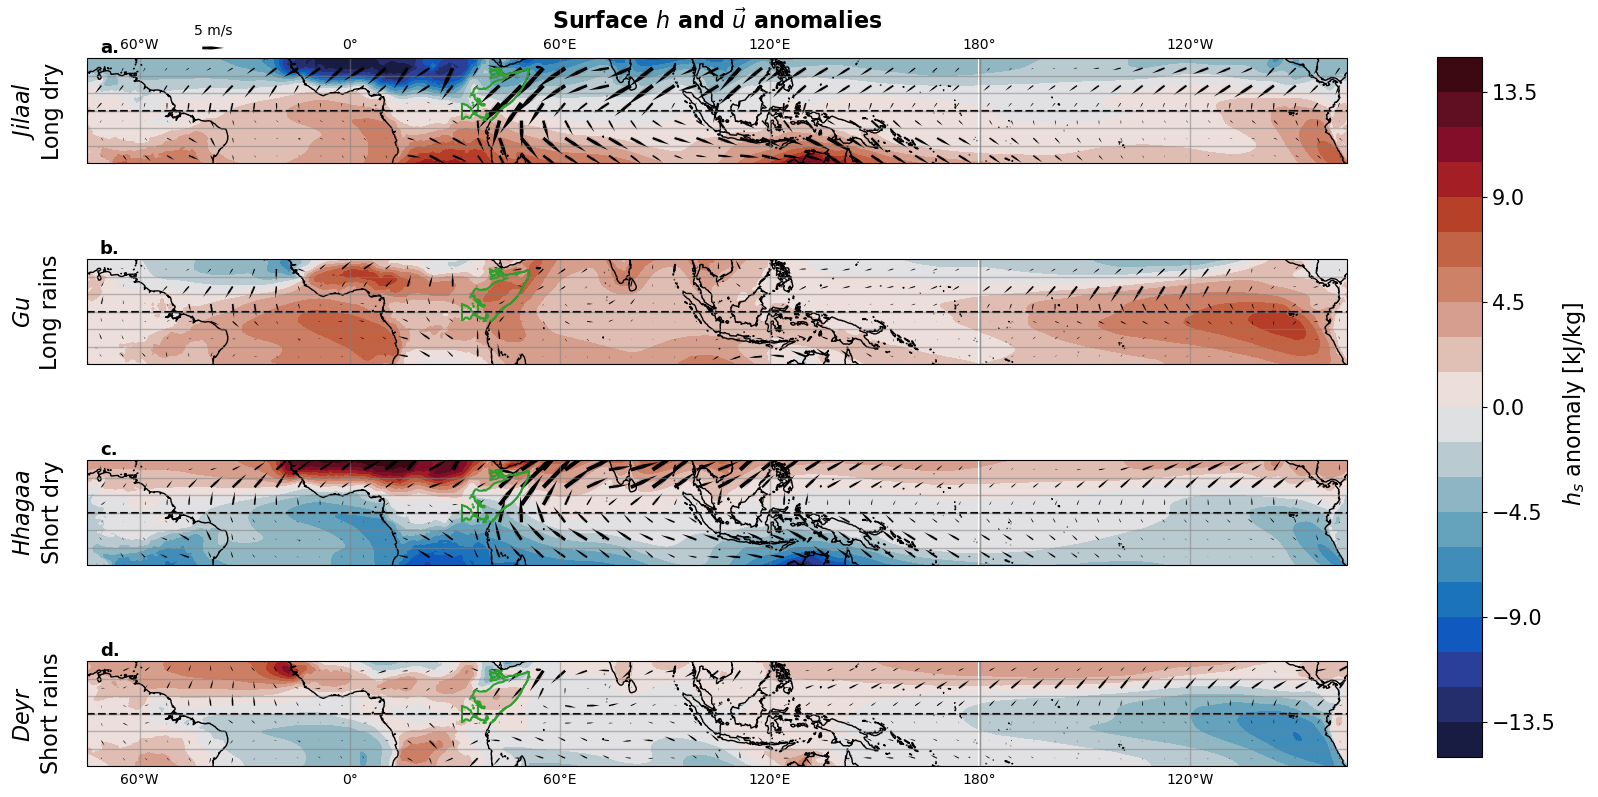

In [4]:
wrapper_figure89(var='h-nsurf',
                 save_fig=True,output_fn=dir_list['figs']+'figure8')

../figures/figure9.pdf saved!
../figures/figure9.png saved!


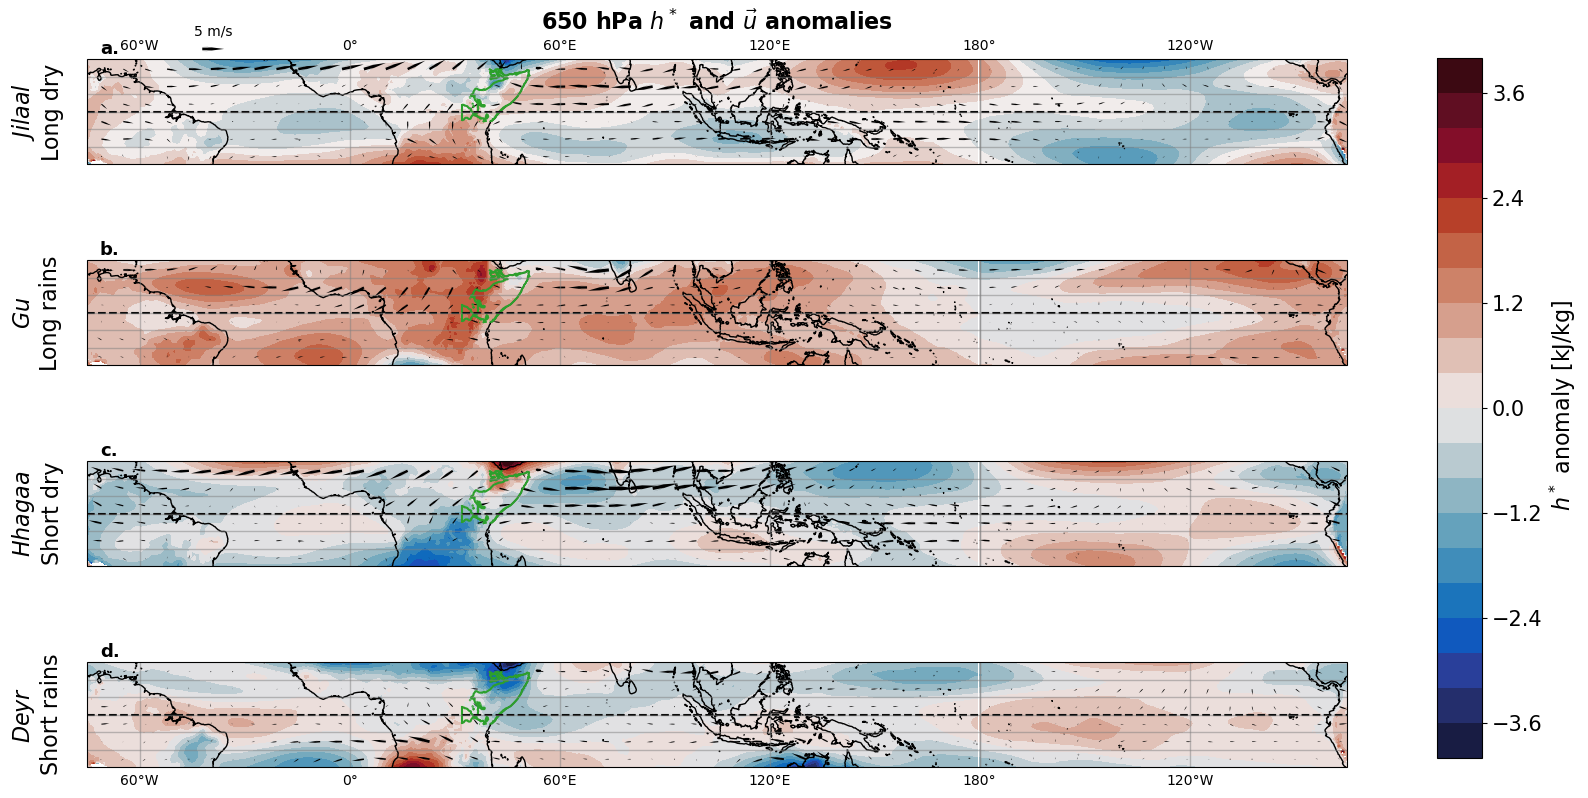

In [5]:
wrapper_figure89(var='hsat',
                 save_fig=True,output_fn=dir_list['figs']+'figure9')

### Figure 10: $P$ vs. $h_s-h^*$

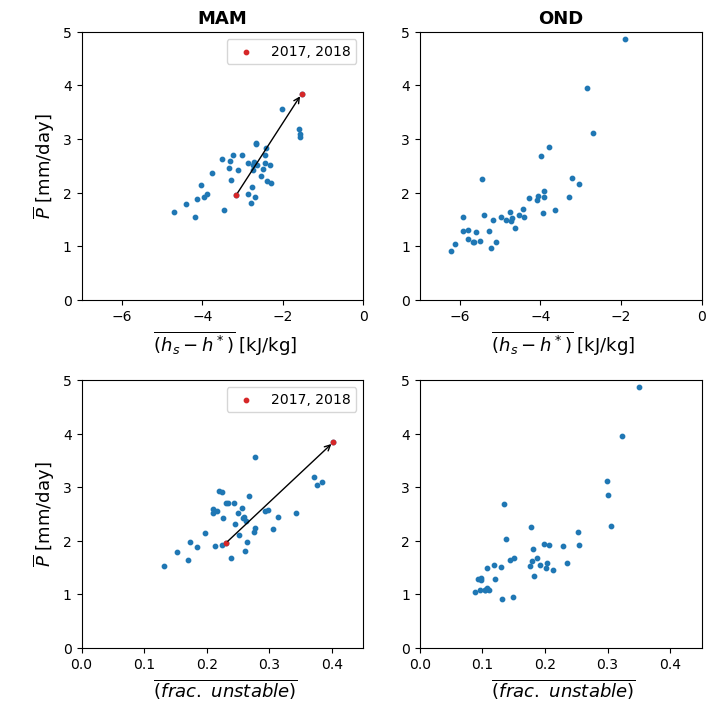

In [4]:
wrapper_figure10(save_fig=True,output_fn=dir_list['figs']+'figure10')

### Figure 11: interannual differences in $P$ vs. $h_s-h^*$

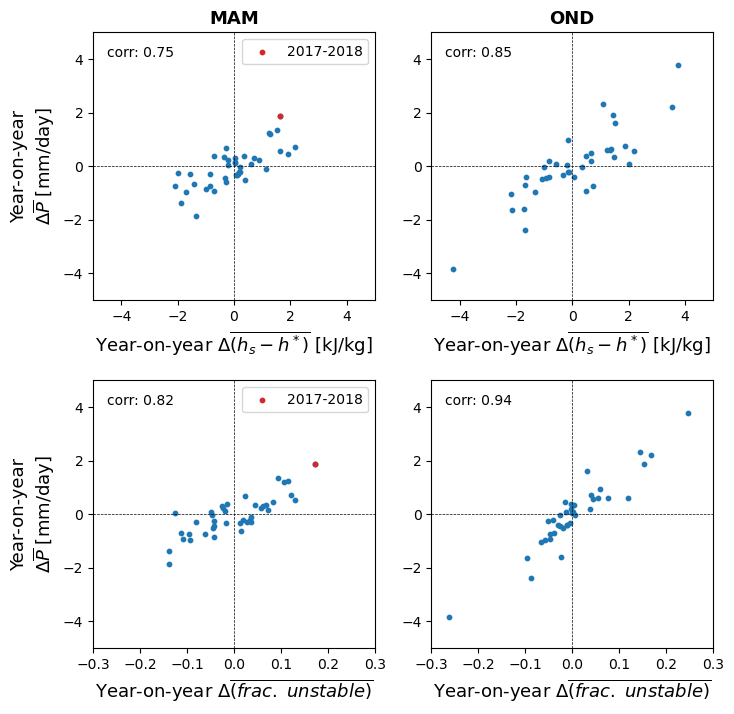

In [5]:
wrapper_figure11(save_fig=True,output_fn=dir_list['figs']+'figure11')

### Figure 12: map differences in $P$, $h_s-h^*$

/home/kschwarz/figures/figure12.pdf saved!
/home/kschwarz/figures/figure12.png saved!


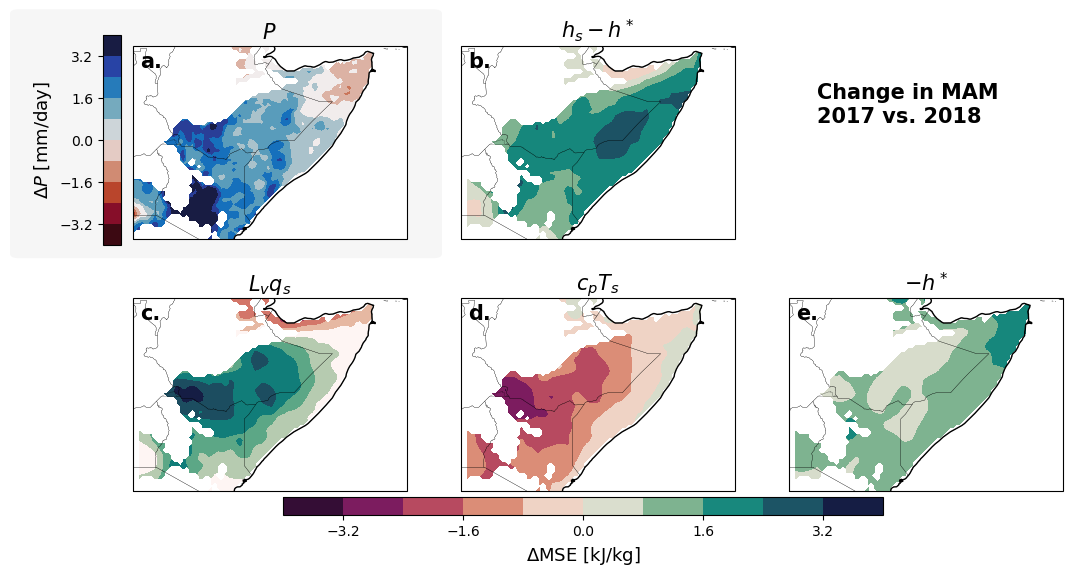

In [9]:
wrapper_figure12(mod_a='MERRA2',yrs=[[2017],[2018]],
                 save_fig=True,output_fn=dir_list['figs']+'figure12')

### Figure S1: vertical structure of $h_s-h^*$

### Figure S3-4: comparison between reanalyses

### Figure S6: Spatial correlations of daily $h_s-h^*$ 

### Figure S7: Spatial correlations of seasonal $h_s-h^*$